<a href="https://colab.research.google.com/github/SohelRaja/ML_repo_college/blob/master/Decision%20Tree%20with%20Python/Decision_Tree_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Algorithm

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#### Importing Dataset from github repo


In [7]:
#This cell will required to run inside the Google colab runtime environment other wise you need to run the below cell.
url = 'https://raw.githubusercontent.com/SohelRaja/ML_repo_college/master/Decision%20Tree%20with%20Python/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url)
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


##### Importing dataset

In [30]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [31]:
telco_arr = np.array(telco.columns)
telco_arr

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Data Analysis

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [32]:
def unique_value_check():
    len_col_telco = len(telco_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(1,len_col_telco):
        val = len(np.unique(telco[telco_arr[i]]))
        print(i," : ",telco_arr[i],":",val,end='\t')
        if(val<10):
            print("---> ",telco[telco_arr[i]].unique().tolist())
        else:
            print("---> [Too Much Values]")
unique_value_check()

Column Name : No. of unique value
---------------------------------
1  :  gender : 2	--->  ['Female', 'Male']
2  :  SeniorCitizen : 2	--->  [0, 1]
3  :  Partner : 2	--->  ['Yes', 'No']
4  :  Dependents : 2	--->  ['No', 'Yes']
5  :  tenure : 73	---> [Too Much Values]
6  :  PhoneService : 2	--->  ['No', 'Yes']
7  :  MultipleLines : 3	--->  ['No phone service', 'No', 'Yes']
8  :  InternetService : 3	--->  ['DSL', 'Fiber optic', 'No']
9  :  OnlineSecurity : 3	--->  ['No', 'Yes', 'No internet service']
10  :  OnlineBackup : 3	--->  ['Yes', 'No', 'No internet service']
11  :  DeviceProtection : 3	--->  ['No', 'Yes', 'No internet service']
12  :  TechSupport : 3	--->  ['No', 'Yes', 'No internet service']
13  :  StreamingTV : 3	--->  ['No', 'Yes', 'No internet service']
14  :  StreamingMovies : 3	--->  ['No', 'Yes', 'No internet service']
15  :  Contract : 3	--->  ['Month-to-month', 'One year', 'Two year']
16  :  PaperlessBilling : 2	--->  ['Yes', 'No']
17  :  PaymentMethod : 4	--->  ['Electro

#### Replacing Suitable Values to Dataset

In [34]:
telco['Partner'].replace(to_replace=[['No'],['Yes']],value=['PartnerNo','PartnerYes'],inplace=True)
telco['Dependents'].replace(to_replace=[['No'],['Yes']],value=['Independent','Dependent'],inplace=True)
telco['PhoneService'].replace(to_replace=[['No'],['Yes']],value=['PSNo','PSYes'],inplace=True)
telco['PaperlessBilling'].replace(to_replace=[['No'],['Yes']],value=['PLBNo','PLBYes'],inplace=True)
telco['MultipleLines'].replace(to_replace=[['No phone service'],['No'],['Yes']],value=['MLNo','MLNo','MLYes'],inplace=True)
telco['OnlineSecurity'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['OSNo','OSNo','OSYes'],inplace=True)
telco['OnlineBackup'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['OBNo','OBNo','OBYes'],inplace=True)
telco['DeviceProtection'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['DPNo','DPNo','DPYes'],inplace=True)
telco['TechSupport'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['TSNo','TSNo','TSYes'],inplace=True)
telco['StreamingTV'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['STVNo','STVNo','STVYes'],inplace=True)
telco['StreamingMovies'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['SMNo','SMNo','SMYes'],inplace=True)
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,PartnerYes,Independent,1,PSNo,MLNo,DSL,OSNo,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,PartnerNo,Independent,34,PSYes,MLNo,DSL,OSYes,...,DPYes,TSNo,STVNo,SMNo,One year,PLBNo,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,PartnerNo,Independent,2,PSYes,MLNo,DSL,OSYes,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,PartnerNo,Independent,45,PSNo,MLNo,DSL,OSYes,...,DPYes,TSYes,STVNo,SMNo,One year,PLBNo,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,PartnerNo,Independent,2,PSYes,MLNo,Fiber optic,OSNo,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,PartnerNo,Independent,8,PSYes,MLYes,Fiber optic,OSNo,...,DPYes,TSNo,STVYes,SMYes,Month-to-month,PLBYes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,PartnerNo,Dependent,22,PSYes,MLYes,Fiber optic,OSNo,...,DPNo,TSNo,STVYes,SMNo,Month-to-month,PLBYes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,PartnerNo,Independent,10,PSNo,MLNo,DSL,OSYes,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBNo,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,PartnerYes,Independent,28,PSYes,MLYes,Fiber optic,OSNo,...,DPYes,TSYes,STVYes,SMYes,Month-to-month,PLBYes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,PartnerNo,Dependent,62,PSYes,MLNo,DSL,OSYes,...,DPNo,TSNo,STVNo,SMNo,One year,PLBNo,Bank transfer (automatic),56.15,3487.95,No


In [35]:
unique_value_check()

Column Name : No. of unique value
---------------------------------
1  :  gender : 2	--->  ['Female', 'Male']
2  :  SeniorCitizen : 2	--->  [0, 1]
3  :  Partner : 2	--->  ['PartnerYes', 'PartnerNo']
4  :  Dependents : 2	--->  ['Independent', 'Dependent']
5  :  tenure : 73	---> [Too Much Values]
6  :  PhoneService : 2	--->  ['PSNo', 'PSYes']
7  :  MultipleLines : 2	--->  ['MLNo', 'MLYes']
8  :  InternetService : 3	--->  ['DSL', 'Fiber optic', 'No']
9  :  OnlineSecurity : 2	--->  ['OSNo', 'OSYes']
10  :  OnlineBackup : 2	--->  ['OBYes', 'OBNo']
11  :  DeviceProtection : 2	--->  ['DPNo', 'DPYes']
12  :  TechSupport : 2	--->  ['TSNo', 'TSYes']
13  :  StreamingTV : 2	--->  ['STVNo', 'STVYes']
14  :  StreamingMovies : 2	--->  ['SMNo', 'SMYes']
15  :  Contract : 3	--->  ['Month-to-month', 'One year', 'Two year']
16  :  PaperlessBilling : 2	--->  ['PLBYes', 'PLBNo']
17  :  PaymentMethod : 4	--->  ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
18  :

In [37]:
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,PartnerYes,Independent,1,PSNo,MLNo,DSL,OSNo,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,PartnerNo,Independent,34,PSYes,MLNo,DSL,OSYes,...,DPYes,TSNo,STVNo,SMNo,One year,PLBNo,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,PartnerNo,Independent,2,PSYes,MLNo,DSL,OSYes,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,PartnerNo,Independent,45,PSNo,MLNo,DSL,OSYes,...,DPYes,TSYes,STVNo,SMNo,One year,PLBNo,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,PartnerNo,Independent,2,PSYes,MLNo,Fiber optic,OSNo,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,PartnerNo,Independent,8,PSYes,MLYes,Fiber optic,OSNo,...,DPYes,TSNo,STVYes,SMYes,Month-to-month,PLBYes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,PartnerNo,Dependent,22,PSYes,MLYes,Fiber optic,OSNo,...,DPNo,TSNo,STVYes,SMNo,Month-to-month,PLBYes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,PartnerNo,Independent,10,PSNo,MLNo,DSL,OSYes,...,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBNo,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,PartnerYes,Independent,28,PSYes,MLYes,Fiber optic,OSNo,...,DPYes,TSYes,STVYes,SMYes,Month-to-month,PLBYes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,PartnerNo,Dependent,62,PSYes,MLNo,DSL,OSYes,...,DPNo,TSNo,STVNo,SMNo,One year,PLBNo,Bank transfer (automatic),56.15,3487.95,No


In [38]:
telco.to_csv('new_telco.csv')

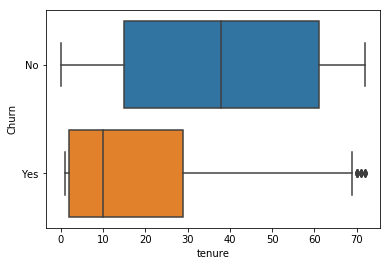

In [39]:
sns.boxplot('tenure','Churn',data=telco)

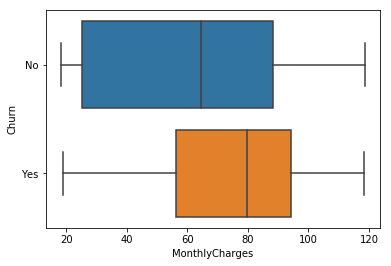

In [40]:
sns.boxplot('MonthlyCharges','Churn',data=telco)

#### droping of useless columns

In [41]:
df = telco.drop(['customerID','tenure','MonthlyCharges','TotalCharges','Contract','Churn'],axis=1)
df2 = telco.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],axis=1)
y = telco['Churn']
print(df2.head(5))
df.head(5)

   tenure  MonthlyCharges
0       1           29.85
1      34           56.95
2       2           53.85
3      45           42.30
4       2           70.70


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,Female,0,PartnerYes,Independent,PSNo,MLNo,DSL,OSNo,OBYes,DPNo,TSNo,STVNo,SMNo,PLBYes,Electronic check
1,Male,0,PartnerNo,Independent,PSYes,MLNo,DSL,OSYes,OBNo,DPYes,TSNo,STVNo,SMNo,PLBNo,Mailed check
2,Male,0,PartnerNo,Independent,PSYes,MLNo,DSL,OSYes,OBYes,DPNo,TSNo,STVNo,SMNo,PLBYes,Mailed check
3,Male,0,PartnerNo,Independent,PSNo,MLNo,DSL,OSYes,OBNo,DPYes,TSYes,STVNo,SMNo,PLBNo,Bank transfer (automatic)
4,Female,0,PartnerNo,Independent,PSYes,MLNo,Fiber optic,OSNo,OBNo,DPNo,TSNo,STVNo,SMNo,PLBYes,Electronic check


##### Object to numpy array conversion

In [42]:
df_arr = np.array(df.columns)
df_arr

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object)

In [43]:
feature_cols = df.columns
feature_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

#### taking dummies and droping useless columns

In [44]:
len_col_df = len(df_arr)
for i in range(len_col_df):
    req_col = df_arr[i]
    req_col = pd.get_dummies(df[req_col],drop_first=True)
    df.drop(df_arr[i],axis=1,inplace=True)
    df = pd.concat([df,req_col],axis=1)
df.head()

,Male,1,PartnerYes,Independent,PSYes,MLYes,Fiber optic,No,OSYes,OBYes,DPYes,TSYes,STVYes,SMYes,PLBYes,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1
2,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0


In [45]:
np.array(df.columns)

array(['Male', 1, 'PartnerYes', 'Independent', 'PSYes', 'MLYes',
       'Fiber optic', 'No', 'OSYes', 'OBYes', 'DPYes', 'TSYes', 'STVYes',
       'SMYes', 'PLBYes', 'Credit card (automatic)', 'Electronic check',
       'Mailed check'], dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
Male                       7043 non-null uint8
1                          7043 non-null uint8
PartnerYes                 7043 non-null uint8
Independent                7043 non-null uint8
PSYes                      7043 non-null uint8
MLYes                      7043 non-null uint8
Fiber optic                7043 non-null uint8
No                         7043 non-null uint8
OSYes                      7043 non-null uint8
OBYes                      7043 non-null uint8
DPYes                      7043 non-null uint8
TSYes                      7043 non-null uint8
STVYes                     7043 non-null uint8
SMYes                      7043 non-null uint8
PLBYes                     7043 non-null uint8
Credit card (automatic)    7043 non-null uint8
Electronic check           7043 non-null uint8
Mailed check               7043 non-null uint8
dtypes: uint8(18)
memory usage: 123.9 KB


#### Making the data scaled¶

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(df2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
scaler_features = scaler.transform(df2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#### Converting the scaled data into pandas dataframe

In [51]:
scaler_df = pd.DataFrame(scaler_features)

#### Joining of two pandas DataFrame 

In [52]:
X = pd.concat([df,scaler_df],axis=1)
X.head()

,Male,1,PartnerYes,Independent,PSYes,MLYes,Fiber optic,No,OSYes,OBYes,DPYes,TSYes,STVYes,SMYes,PLBYes,Credit card (automatic),Electronic check,Mailed check,0,1
0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,-1.277445,-1.160323
1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0.066327,-0.259629
2,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,-1.236724,-0.362660
3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0.514251,-0.746535
4,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,-1.236724,0.197365


In [53]:
X.columns

Index([                   'Male',                         1,
                    'PartnerYes',             'Independent',
                         'PSYes',                   'MLYes',
                   'Fiber optic',                      'No',
                         'OSYes',                   'OBYes',
                         'DPYes',                   'TSYes',
                        'STVYes',                   'SMYes',
                        'PLBYes', 'Credit card (automatic)',
              'Electronic check',            'Mailed check',
                               0,                         1],
      dtype='object')

#### Taking dummy value for target column

In [54]:
Y = pd.get_dummies(y,drop_first=True)
Y.head()

,Yes
0,0
1,0
2,1
3,0
4,1


#### Spliting of Training and testing dataset

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Training of the model with the help of CART(Gini Index) Algorithm

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtree = DecisionTreeClassifier()

In [59]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions

In [60]:
predictions = dtree.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [62]:
cla_CART = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_CART)

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1539
           1       0.51      0.52      0.51       574

   micro avg       0.73      0.73      0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [63]:
con_CART = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_CART)

Confusion matrix:

 [[1245  294]
 [ 273  301]]


In [64]:
acc_CART = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_CART,"%")

Accuracy: 73.16611452910554 %


### Training of the model with the help of ID3(Entropy) Algorithm

In [65]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [66]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction for ID3

In [67]:
predictions = dtree.predict(X_test)

In [68]:
cla_ID3 = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_ID3)

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1539
           1       0.70      0.41      0.51       574

   micro avg       0.79      0.79      0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



In [69]:
con_ID3 = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_ID3)

Confusion matrix:

 [[1437  102]
 [ 340  234]]


In [70]:
acc_ID3 = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_ID3,"%")

Accuracy: 79.08187411263606 %


In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

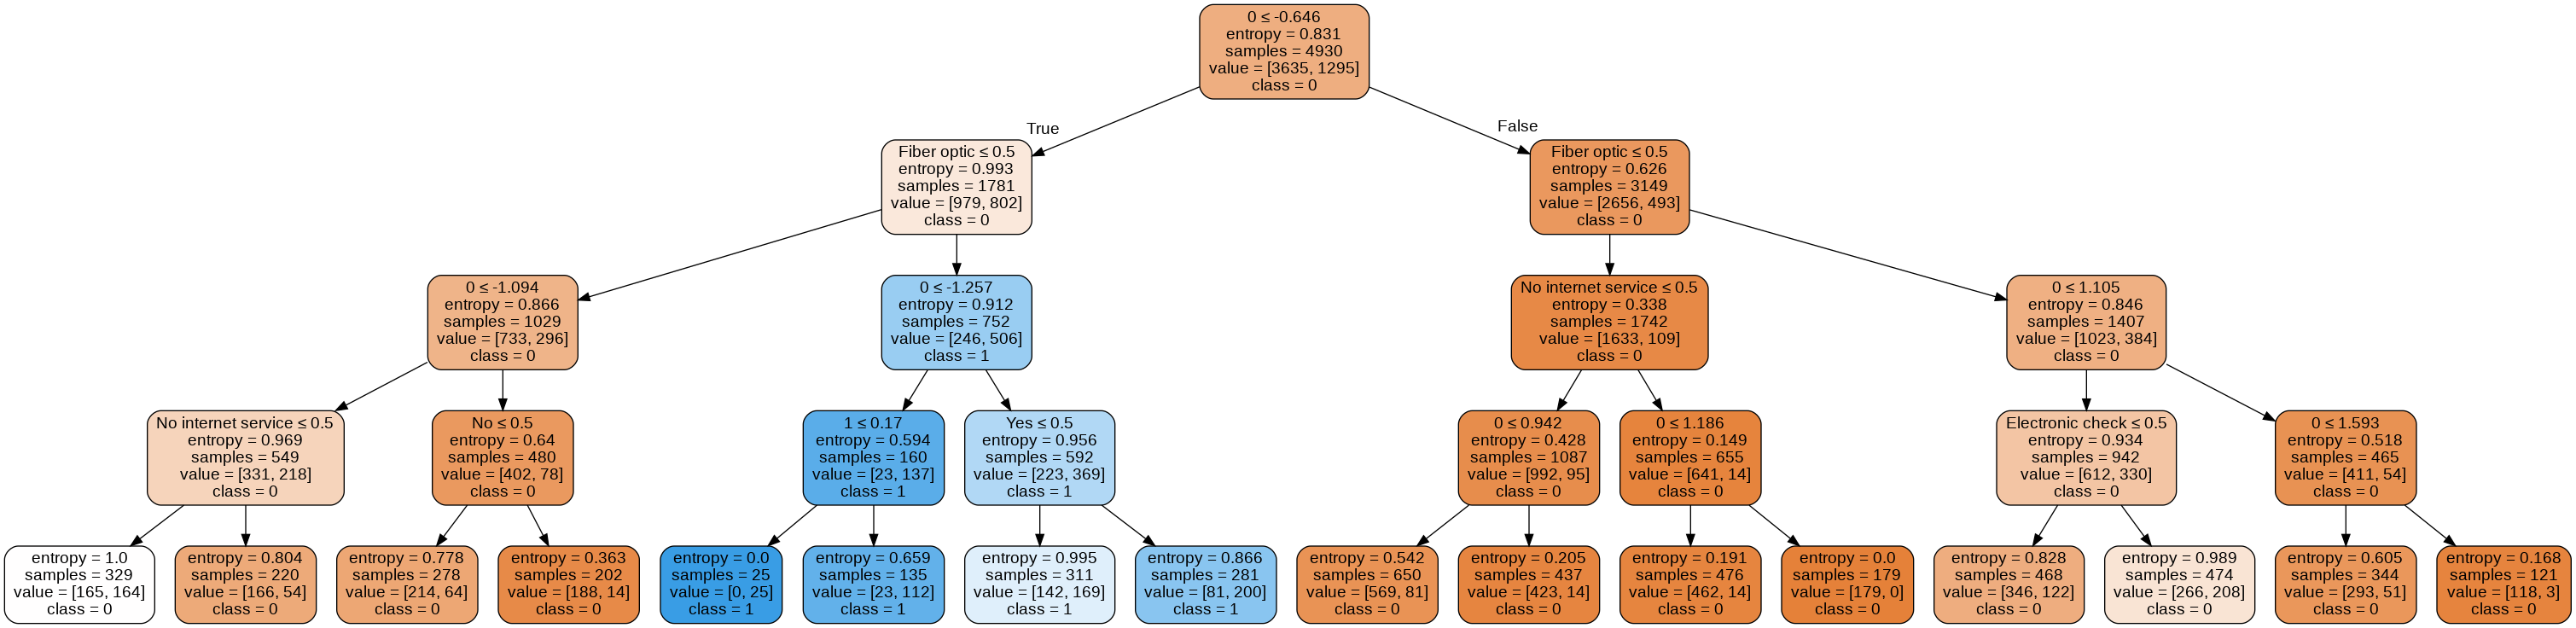

In [82]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())